### 4.1 머신러닝의 네 가지 분류

#### 4.1.1 지도 학습
- `지도학습(supervised learning)` : 훈련 데이터의 입력과 타깃 사이에 있는 관계를 학습하는 것.
- 문자 판독, 음성 인식, 이미지 분류, 언어 번역 등
- 대부분 분류와 회귀로 구성되지만 다음과 같은 경우도 존재
  - `시퀀스 생성(sequence generation)` : 사진이 주어지며 이를 설명하는 캡션을 생성. 시퀀스 생성은 이따금 일련의 분류 문제로 재구성할 수 있다.(시퀀스에 있는 단어나 토큰을 반복적으로 예측)
  - `구문 트리(syntax tree) 예측` : 문장이 주어지면 분해된 구문 트리를 예측
  - `물체 감지(object detection)` : 사진이 주어지면 사진 안의 특정 물체 주위에 경계 상자를 그린다. 이는 분류 문제로 표현되거나(많은 경계 상자 후보가 주어졌을 때 각 상자의 내용을 분류), 경계 상자의 좌표를 벡터 회귀로 예측하는 회귀와 분류가 결합된 문제로 표현할 수 있다.
  - `이미지 분할(image segmentation)` : 사진이 주어졌을 때 픽셀 단위로 특정 물체에 마스킹(masking)함.

#### 4.1.2 비지도 학습
- 데이터 시각화, 데이터 압축, 데이터의 노이즈 제거, 데이터에 있는 상관관계를 더 잘 이해하기 위해
- `비지도 학습(unsupervised learning)`, `차원 축소(dimensionality reduction)`, `군집(clustering)`

#### 4.1.3 자기 지도 학습
- `자기 지도 학습(self-supervised learning)` : 레이블을 `경험적인 알고리즘(heuristic algorithm)`을 사용하여 입력 데이터로 부터 생성한다.
- `오토인코더(autoencoder)` 
- 지난 프레임이 주어졌을 때 비디오의 다음 프레임을 예측하는 것이나, 이전 단어가 주어졌을 때 다음 단어를 예측하는 것. (`시간에 따른 지도 학습(temporally supervised learning)`)

#### 4.1.4 강화 학습
- `강화학습(reinforcement learning)` : `에이전트(agent)`에 환경에 대한 정보를 입력하여 보상을 최대화하는 행동을 선택하도록 훈련시킴. 

### 4.2 머신러닝 모델 평가
- 머신러닝의 목표 : 처음 본 데이터에서 잘 작동하는 `일반화`된 모델을 얻는 것

#### 4.2.1 훈련, 검증, 테스트 세트
- 모델을 개발할 때 항상 모델의 설정을 튜닝한다.(하이퍼파라미터 튜닝)
- 검증세트에서 모델의 성능을 평가하여 튜닝을 수행하는데, 계속해서 검증 세트로 튜닝을 진행하다보면 `정보 누설(information leak)`이 생겨 검증 세트에 과대적합 될 수 있다. 
- 데이터가 적을 때 다음의 몇 가지 고급 기법을 사용할 수 있다.
  1) `단순 홀드아웃 검증(hold-out validation)`
  2) 'K-겹 교차 검증(K-fold cross-validation)`
  3) '셔플링(shuffling)`을 사용한 `반복 K-겹 교차 검증(iterated K-fold cross-validation)`


##### * 단순 홀드아웃 검증
- 데이터의 일정량을 테스트 세트로 떼어 놓는다.
- 정보의 누설을 막기 위해 테스트 세트를 사용하여 모델을 튜닝하면 안된다.
- 데이터가 너무 적을 때는 검증 세트와 테스트 세트의 샘플이 너무 적어 주어진 전체 데이터를 통계적으로 대표하지 못할 수 있다.
- 다른 난수값으로 초기화하여 셔플링 후 데이터를 나누었을 때 모델 성능이 매우 달라지면 이 문제라고 할 수 있다. 이는 K-겹 교차검증과 반복 K-겹 교차 검증으로 해결할 수 있다.

```
# 홀드아웃 검증 구현 예
num_validation_samples = 10000

np.random.shuffle(data)
validation_data = data[:num_validation_samples] # 검증세트
data = data[num_validation_samples:]

training_data = data[:] # 훈련 세트

model = get_model()
model.train(training_data)
validation_score = model.evaluate(validation_data)

# 튜닝, 훈련, .., 반복


# 하이퍼파라미터 튜닝이 끝나면 테스트 데이터를 제외한 모든 데이터를 사용하여 모델을 다시 훈련시킨다.
model = get_model()
model.train(np.concatenate([training_data, validation_data]))
test_score = model.evalueate(test_data)

```

##### * K-겹 교차 검증
- 데이터를 동일한 크기를 가진 K개의 분할로 나눈다. 
- 각 분할 i에 대해 남은 K-1개의 분할로 모델을 훈련하고 분할 i에서 모델을 평가한다.
- 이렇게 얻은 K개의 점수를 평균내어 최종 점수를 얻어낸다.

```
# k-겹 교차 검증 구현 예
k=4
num_validation_samples = len(data) // k

np.random.shuffle(data)

validation_scores = []
for fold in rangd(k):
  validation_data = data[num_validation_samples * fold:num_validatio_samples * (fold + 1)]
  training_data = data[:num_validation_samples * fold] + data[num_validation_samples * (fold+1):]

  model = get_model()
  model.train(training_data)
  validation_score = model.evaluate(validation_data)
  validation_scores.append(validation_score)

validation_score = np.average(validation_scores)

model - get_model()
mode.train(data)
test_score = model.evaluate(test_data)
```

##### * 셔플링을 사용한 반복 K-겹 교차 검증
- 가용 데이터가 적고 가능한 정확하게 모델을 평가하고자 할 때 사용.
- K-겹 교차 검증을 여러 번 적용하되 K개의 분할로 나누기 전에 매번 데이터를 무작위로 섞는다.

#### 4.2.2 평가 방식 선택 시 유념해야 할 점
1. 대표성 있는 데이터
  - 훈련 세트와 테스트 세트가 주어진 데이터에 대한 대표성이 있어야 한다.
2. 시간의 방향
  - 과거로 부터 미래를 예측하고자 한다면 데이터 분할 시 무작위로 섞으면 안된다. 
  - 훈련 세트의 데이터가 테스트 세트에 있는 모든 데이터보다 과거의 것이여야 한다.
3. 데이터 중복
  - 한 데이터 셋에서 어떤 포인트가 두 번 등장하면 데이터를 섞고 훈련 세트와 검증 세트로 나누었을 때 훈련 세트와 검증 세트에 포인터가 중복될 수 있다.
  

### 4.3 데이터 전처리, 특성 공학, 특성 학습


#### 4.3.1 신경망을 위한 데이터 전처리
- 데이터 전처리의 목적 : 주어진 원본 데이터를 신경망에 적용하기 쉽도록 만드는 것
- `벡터화(vectorization)`, `정규화(normalization)`, `누락된 값 다루기`, `특성 추출`

- 벡터화
  - 신경망에서 모든 입력과 타깃은 부동 소수 데이터로 이루어진 텐서여야 한다.
  - `데이터 벡터화(data vectorization)` : 사운드, 이미지, 텍스트 등 처리해야 할 것을 텐서로 변환하는 과정

- 값 정규화
  - 일반적으로 비교적 큰 값(예를 들어 네트워크 가중치 초깃값보다 훨씬 큰 여러 자릿수를 가지는 정수)이나 균일하지 않은 데이터(예를 들어 한 특성의 범위는 0~1이고 다른 특성은 100~200인 데이터)를 신경망에 주입하는 것은 위험하다.
  - 네트워크를 잘 학습시키기 위해
    1. 작은 값을 취하게 하고 : 일반적으로 대부분의 값이 0~1 사이여야 한다.
    2. 균일해야 한다. : 모든 특성이 대체로 비슷한 범위를 가져야 한다.

- 누락된 값 다루기
  - 일반적으로 신경망에서 0이 사전에 정의된 의미 있는 값이 아니라면 누락된 값을 0으로 입력해도 괜찮다. 네트워크가 0이 누락된 데이터를 의미함을 학습하면 이 값을 무시하기 시작한다.
    - 참고) 훈련 세트에 누락된 값을 해당 특성의 평균 또는 중간 값으로 대체하기로 했다면 계산된 평균 또는 중간 값을 기록해 놓아야 한다. 테스트 세트에서 해당 특성에 누락된 값이 있다면 훈련 세트에서 계산한 값으로 채운다. 
    - 마찬가지로 교차 검증 단계 안에서 훈련 데이터에서 계산된 평균 또는 중간 값이 검증데이터에 적용되어야 한다.
    - 일반적으로 어떤 방법이 주어진 문제에 적합한지 직관적으로 알기 어려우며 교차 검증을 통해 알아 보아야 한다,
  - 테스트 데이터에 누락된 값이 포함될 가능성이 있다고 가정하고, 만약 훈련데이터에 누락된 값이 없다면, 네트워크는 누락된 값을 무시하는 법을 알지 못한다. 따라서 이런 경우 누락된 값이 있는 훈련 샘플을 고의적으로 만들어야 한다.
    - 훈련 샘플의 일부를 여러벌 복사해서 테스트 데이터에서 빠질 것 같은 특성을 제거한다.
    - 훈련 데이터에 누락된 값이 있는 샘플이 적다면 테스트 세트를 떼어 놓기 전에 이 샘플들을 제외시킬 수 있다.
    - 또한, 누락된 값이 있는 특성이 덜 중요하다고 판단된다면 이 특성을 모두 제외시킬 수 있다.

#### 4.3.2 특성 공학
- 데이터와 머신 러닝 알고리즘에 관한 지식을 사용하는 단계
- 모델이 수월하게 작업할 수 있는 어떤 방식으로 데이터가 표현될 필요가 있다.
- 딥러닝 이전에의 전통적인 얕은 학습 방법의 알고리즘들은 스스로 유용한 특성을 학습할 만큼 충분히 넓은 가설 공간을 가지고 있지 않았다. 따라서 특성 공학이 중요했다.
- 최근 딥러닝의 경우 대부분 신경망이 자동으로 원본 데이터에서 유용한 특성을 추출할 수 있어 대부분 특성공학이 필요하지 않다.
- 하지만 다음과 같은 이유로 특성 공학은 여전히 중요하다.
  - 좋은 특성은 적은 자원을 사용하여 문제를 더 잘 풀어낼 수 있다.
  - 좋은 특성은 더 적은 데이터로 문제를 풀 수 있다. 딥러닝 모델이 스스로 특성을 학습하는 능력은 가용한 훈련 데이터가 많을 때 발휘된다. 샘플의 개수가 적다면 특성에 있는 정보가 매우 중요하다.

### 4.4 과대적합과 과소적합
- `과대적합(overfitting)`
- `최적화(optimization)` : 가능한 훈련 데이터에서 최고의 성능을 얻으려고 모델을 조정하는 과정
- `일반화(generalization)` : 훈련된 모델이 이전에 본 적 없는 데이터에서 얼마나 잘 수행되는지 의미한다. 
- `과소적합(underfitting)` : 모델 성능이 더 개선될 여지가 있는 상태
- 과대적합을 막는 방법
  - 더 많은 훈련 데이터를 모으는 것
  - `규제(regularization)`모델이 수용할 수 있는 정보의 양을 조절하거나 저장할 수 있는 정보에 제약을 가하는 것

#### 4.4.1 네트워크 크기 축소
- `모델의 용량(capacity)` : 모델에 있는 학습 파라미터의 수
- 파라미터의 수는 층의 수와 각 층의 유닛 수에 의해 결정됨.
- 기억 용량에 제한이 있다면 손실을 최소화하기 위해 타깃에 대한 예측 성능을 가진 압축 표현을 학습해야 한다. 동시에 기억해야 할 것은 과소적합되지 않도록 충분한 파라미터를 가진 모델을 사용해야 한다.
- 일반적인 작업 흐름은 비교적 적은 수의 층과 파라미터로 시작한다.

In [ ]:
# IBDM 데이터셋 로드
from keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words = 10000)

17473536/17464789 [==============================] - 0s 0us/step


In [ ]:
import numpy as np

def vectorize_sequences(sequences, dimension = 10000):
  results = np.zeros((len(sequences), dimension)) #원소가 모두 0인 행렬 생성
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1.
  return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [ ]:
y_train = np.asarray(train_labels).astype('float32')
y_test  = np.asarray(test_labels).astype('float32')

In [ ]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [ ]:
# 원본 모델
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation = 'relu', input_shape = (10000,)))
model.add(layers.Dense(16, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

In [ ]:
from tensorflow.keras import optimizers
from tensorflow.keras import metrics

model.compile(optimizer = 'rmsprop',
              loss = 'binary_crossentropy',
              metrics = ['acc'])

In [ ]:
orginal_history = model.fit(partial_x_train, partial_y_train, epochs = 20, batch_size = 512, validation_data = (x_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 55ms/step - loss: 0.4824 - acc: 0.8001 - val_loss: 0.3634 - val_acc: 0.8706
Epoch 2/20
30/30 [==============================] - 1s 44ms/step - loss: 0.2838 - acc: 0.9066 - val_loss: 0.2925 - val_acc: 0.8870
Epoch 3/20
30/30 [==============================] - 1s 43ms/step - loss: 0.2083 - acc: 0.9319 - val_loss: 0.2783 - val_acc: 0.8898
Epoch 4/20
30/30 [==============================] - 1s 44ms/step - loss: 0.1665 - acc: 0.9444 - val_loss: 0.2794 - val_acc: 0.8888
Epoch 5/20
30/30 [==============================] - 2s 54ms/step - loss: 0.1327 - acc: 0.9583 - val_loss: 0.2867 - val_acc: 0.8871
Epoch 6/20
30/30 [==============================] - 1s 46ms/step - loss: 0.1108 - acc: 0.9640 - val_loss: 0.3100 - val_acc: 0.8845
Epoch 7/20
30/30 [==============================] - 1s 43ms/step - loss: 0.0894 - acc: 0.9732 - val_loss: 0.3276 - val_acc: 0.8795
Epoch 8/20
30/30 [==============================] - 1s 42ms/step - loss: 0.0696 - a

In [ ]:
# 작은 용량의 모델 
# 원본 모델
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(6, activation = 'relu', input_shape = (10000,)))
model.add(layers.Dense(6, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

In [ ]:
from tensorflow.keras import optimizers
from tensorflow.keras import metrics

model.compile(optimizer = 'rmsprop',
              loss = 'binary_crossentropy',
              metrics = ['acc'])

In [ ]:
smaller_history = model.fit(partial_x_train, partial_y_train, epochs = 20, batch_size = 512, validation_data = (x_val, y_val))

Epoch 1/20
30/30 [==============================] - 5s 88ms/step - loss: 0.6267 - acc: 0.6825 - val_loss: 0.5657 - val_acc: 0.7957
Epoch 2/20
30/30 [==============================] - 2s 52ms/step - loss: 0.5048 - acc: 0.8513 - val_loss: 0.4743 - val_acc: 0.8628
Epoch 3/20
30/30 [==============================] - 2s 57ms/step - loss: 0.4074 - acc: 0.8966 - val_loss: 0.4003 - val_acc: 0.8799
Epoch 4/20
30/30 [==============================] - 2s 72ms/step - loss: 0.3279 - acc: 0.9201 - val_loss: 0.3455 - val_acc: 0.8839
Epoch 5/20
30/30 [==============================] - 2s 53ms/step - loss: 0.2682 - acc: 0.9318 - val_loss: 0.3105 - val_acc: 0.8891
Epoch 6/20
30/30 [==============================] - 2s 60ms/step - loss: 0.2241 - acc: 0.9409 - val_loss: 0.2899 - val_acc: 0.8890
Epoch 7/20
30/30 [==============================] - 2s 53ms/step - loss: 0.1911 - acc: 0.9473 - val_loss: 0.2800 - val_acc: 0.8898
Epoch 8/20
30/30 [==============================] - 1s 48ms/step - loss: 0.1649 - a

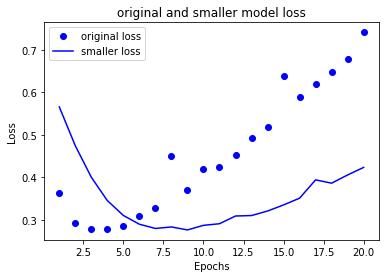

In [ ]:
# 원본, small 모델의 손실 그래프
import matplotlib.pyplot as plt

org_history_dict = orginal_history.history
small_history_dict = smaller_history.history

org_loss = org_history_dict['val_loss']
small_loss = small_history_dict['val_loss']

epochs = range(1, len(org_loss)+1)

plt.plot(epochs, org_loss, 'bo', label = 'original loss')
plt.plot(epochs, small_loss, 'b', label = 'smaller loss')
plt.title('original and smaller model loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

# 더 나중에 과대적합 된다.

In [ ]:
# 큰 용량의 모델
model = models.Sequential()
model.add(layers.Dense(1024, activation = 'relu', input_shape = (10000,)))
model.add(layers.Dense(1024, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

In [ ]:
model.compile(optimizer = 'rmsprop',
              loss = 'binary_crossentropy',
              metrics = ['acc'])

In [ ]:
bigger_history = model.fit(partial_x_train, partial_y_train, epochs = 20, batch_size = 512, validation_data = (x_val, y_val))

Epoch 1/20
30/30 [==============================] - 27s 895ms/step - loss: 0.7022 - acc: 0.7604 - val_loss: 0.8525 - val_acc: 0.6193
Epoch 2/20
30/30 [==============================] - 21s 696ms/step - loss: 0.2438 - acc: 0.9075 - val_loss: 0.2878 - val_acc: 0.8851
Epoch 3/20
30/30 [==============================] - 20s 689ms/step - loss: 0.1679 - acc: 0.9364 - val_loss: 0.2683 - val_acc: 0.8913
Epoch 4/20
30/30 [==============================] - 20s 679ms/step - loss: 0.0469 - acc: 0.9847 - val_loss: 0.4419 - val_acc: 0.8709
Epoch 5/20
30/30 [==============================] - 19s 629ms/step - loss: 0.2037 - acc: 0.9761 - val_loss: 0.3171 - val_acc: 0.8875
Epoch 6/20
30/30 [==============================] - 19s 639ms/step - loss: 0.0022 - acc: 1.0000 - val_loss: 0.4856 - val_acc: 0.8872
Epoch 7/20
30/30 [==============================] - 19s 641ms/step - loss: 1.7915e-04 - acc: 1.0000 - val_loss: 0.5621 - val_acc: 0.8895
Epoch 8/20
30/30 [==============================] - 19s 626ms/ste

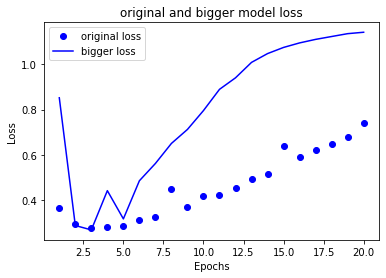

In [ ]:
# 원본, big 모델의 검증 손실 그래프
import matplotlib.pyplot as plt

org_history_dict = orginal_history.history
big_history_dict = bigger_history.history

org_loss = org_history_dict['val_loss']
big_loss = big_history_dict['val_loss']

epochs = range(1, len(org_loss)+1)

plt.plot(epochs, org_loss, 'bo', label = 'original loss')
plt.plot(epochs, big_loss, 'b', label = 'bigger loss')
plt.title('original and bigger model loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()



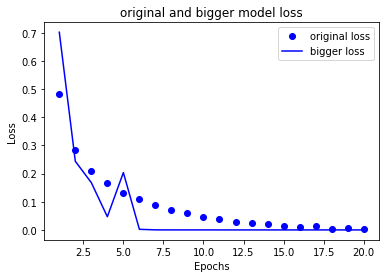

In [ ]:
# 원본, big 모델의 훈련 손실 그래프
import matplotlib.pyplot as plt

org_history_dict = orginal_history.history
big_history_dict = bigger_history.history

org_loss = org_history_dict['loss']
big_loss = big_history_dict['loss']

epochs = range(1, len(org_loss)+1)

plt.plot(epochs, org_loss, 'bo', label = 'original loss')
plt.plot(epochs, big_loss, 'b', label = 'bigger loss')
plt.title('original and bigger model loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()



#### 4.4.2 가중치 규제 추가
- `오캄의 면도날(Occam's razor)` : 어떤 것에 대한 두 가지의 설명이 있다면 더 적은 가정이 필요한 간단한 설명이 옳을 것이라는 이론
- `가중치 규제(weight regularization)` : 과대적합을 완화하기 위한 일반적인 방법은 네트워크의 복잡도에 제한을 두어 가중치가 작은 값을 가지도록 강제하는 것. 네트워크의 손실 함수에 가중치에 연관된 비용을 추가한다.
  - `L1 규제` : 가중치의 절댓값에 비례하는 비용이 추가됨 (가중치의 L1 노름)
  - `L2 규제` : 가중치의 제곱에 비례하는 비용이 추가됨 (가중치의 L2 노름), L2 규제는 신경망에서 `가중치 감쇠(weight decay)`라고도 부른다. 수학적으로 동일하다.

```
# 케라스에서 사용할 수 있는 가중치 규제
from keras import regularizers

regularizers.l1(0.001)

regularizers.l2(0.001)

regularizers.l1_l2(l1 = 0.001, l2 = 0.001)

```

In [ ]:
# 모델에 L2 가중치 추가하기
from keras import regularizers

model = models.Sequential()
model.add(layers.Dense(16, kernel_regularizer = regularizers.l2(0.001), activation = 'relu', input_shape=(10000,)))
model.add(layers.Dense(16, kernel_regularizer = regularizers.l2(0.001), activation = 'relu', input_shape=(10000,)))
model.add(layers.Dense(1, activation = 'sigmoid'))

In [ ]:
model.compile(optimizer = 'rmsprop',
              loss = 'binary_crossentropy',
              metrics = ['acc'])

In [ ]:
regul_history = model.fit(partial_x_train, partial_y_train, epochs = 20, batch_size = 512, validation_data = (x_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 62ms/step - loss: 0.5478 - acc: 0.7853 - val_loss: 0.4501 - val_acc: 0.8380
Epoch 2/20
30/30 [==============================] - 1s 45ms/step - loss: 0.3552 - acc: 0.8979 - val_loss: 0.3611 - val_acc: 0.8818
Epoch 3/20
30/30 [==============================] - 1s 44ms/step - loss: 0.2871 - acc: 0.9215 - val_loss: 0.3321 - val_acc: 0.8907
Epoch 4/20
30/30 [==============================] - 1s 44ms/step - loss: 0.2522 - acc: 0.9341 - val_loss: 0.3500 - val_acc: 0.8796
Epoch 5/20
30/30 [==============================] - 1s 44ms/step - loss: 0.2329 - acc: 0.9407 - val_loss: 0.3317 - val_acc: 0.8873
Epoch 6/20
30/30 [==============================] - 1s 43ms/step - loss: 0.2140 - acc: 0.9472 - val_loss: 0.3422 - val_acc: 0.8834
Epoch 7/20
30/30 [==============================] - 1s 44ms/step - loss: 0.2024 - acc: 0.9543 - val_loss: 0.3524 - val_acc: 0.8798
Epoch 8/20
30/30 [==============================] - 1s 44ms/step - loss: 0.1945 - a

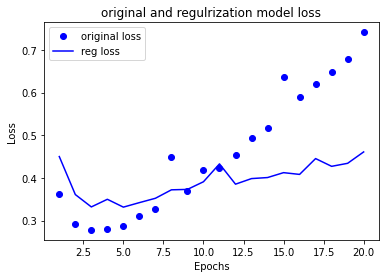

In [ ]:
# 원본, big 모델의 검증 손실 그래프
import matplotlib.pyplot as plt

org_history_dict = orginal_history.history
regul_history_dict = regul_history.history

org_loss = org_history_dict['val_loss']
regul_loss = regul_history_dict['val_loss']

epochs = range(1, len(org_loss)+1)

plt.plot(epochs, org_loss, 'bo', label = 'original loss')
plt.plot(epochs, regul_loss, 'b', label = 'reg loss')
plt.title('original and regulrization model loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

#### 4.4.3 드롭아웃 추가
- '드롭아웃(dropout)` : 출력 벡터의 일부를 무작위로 0으로 바꾼다. 드롭아웃 비율은 0이 될 특성의 비율이다. 테스트 단계에서는 어떤 유닛도 드롭아웃되지 않는다. 그 대신 층의 출력을 드롭아웃 비율에 비례하여 줄여준다.
- 뉴런의 일부를 무작위하게 제거하여 뉴런의 부정한 협업을 방지하고 결국 과대적합을 감소시키는 것
- 층의 출력 값에 노이즈를 추가하여 중요하지 않은 우연한 패턴을 깨뜨리는 것. 만약 노이즈가 없다면 네트워크가 이 패턴을 기억할 것이다.

In [ ]:
# 드롭아웃 추가
model = models.Sequential()
model.add(layers.Dense(16, activation = 'relu', input_shape = (10000,)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(16, activation = 'relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation = 'sigmoid'))

In [ ]:
model.compile(optimizer = 'rmsprop',
              loss = 'binary_crossentropy',
              metrics = ['acc'])

In [ ]:
dropout_history = model.fit(partial_x_train, partial_y_train, epochs = 20, batch_size = 512, validation_data = (x_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 57ms/step - loss: 0.6344 - acc: 0.6349 - val_loss: 0.5193 - val_acc: 0.8566
Epoch 2/20
30/30 [==============================] - 1s 47ms/step - loss: 0.5143 - acc: 0.7662 - val_loss: 0.4145 - val_acc: 0.8704
Epoch 3/20
30/30 [==============================] - 2s 60ms/step - loss: 0.4316 - acc: 0.8240 - val_loss: 0.3454 - val_acc: 0.8805
Epoch 4/20
30/30 [==============================] - 1s 44ms/step - loss: 0.3762 - acc: 0.8596 - val_loss: 0.3046 - val_acc: 0.8886
Epoch 5/20
30/30 [==============================] - 1s 47ms/step - loss: 0.3296 - acc: 0.8779 - val_loss: 0.2871 - val_acc: 0.8902
Epoch 6/20
30/30 [==============================] - 2s 65ms/step - loss: 0.2932 - acc: 0.8989 - val_loss: 0.2868 - val_acc: 0.8833
Epoch 7/20
30/30 [==============================] - 2s 54ms/step - loss: 0.2585 - acc: 0.9150 - val_loss: 0.2733 - val_acc: 0.8914
Epoch 8/20
30/30 [==============================] - 2s 59ms/step - loss: 0.2315 - a

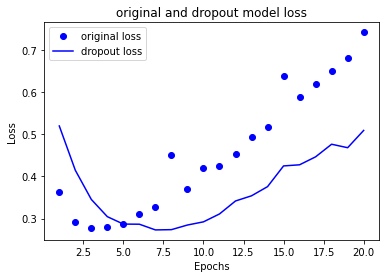

In [ ]:
# 원본, dropout 모델의 검증 손실 그래프
import matplotlib.pyplot as plt

org_history_dict = orginal_history.history
dropout_history_dict = dropout_history.history

org_loss = org_history_dict['val_loss']
dropout_loss = dropout_history_dict['val_loss']

epochs = range(1, len(org_loss)+1)

plt.plot(epochs, org_loss, 'bo', label = 'original loss')
plt.plot(epochs, dropout_loss, 'b', label = 'dropout loss')
plt.title('original and dropout model loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

### 4.5 보편적인 머신 러닝 작업 흐름

#### 4.5.1 문제 정의와 데이터셋 수집
- 입력, 출력 정의
- 모델의 구조와 손실 함수 선택
- 적절한 데이터인지 검토
- 2가지 가설
  1. 주어진 입력으로 출력을 예측할 수 있다.
  2. 가용한 데이터에 입력과 출력 사이의 관계를 학습하는데 충분하 정보가 있다. 

#### 4.5.2 성공 지표 선택

#### 4.5.3 평가 방법 선택
- 홀드아웃 검증 세트 분리 : 데이터가 풍부할 때 사용
- K-겹 교차 검증: 홀드아웃 검증을 사용하기에 샘플의 수가 너무 적을 때 사용
- 반복 K-겹 교차 검증: 데이터가 적고 매우 정확한 모델 평가가 필요할 때 사용

#### 4.5.4 데이터 준비
- 데이터를 텐서로 구성한다.
- 작은 값으로 스케일을 조정한다. [-1,1],[0,1]
- 특성마다 범위가 다르다면 정규화한다.
- 특성 공학을 수행한다. 특히 데이터가 적다면

#### 4.5.5 기본보다 나은 모델 훈련하기
- `통계적 검정력(statistical power)`
- 여러 개의 타당성 있는 네트워크 구조를 시도해보고 무작위로 예측하는 모델보다 낫지 않다면 입력 데이터에 존재하지 않는 것을 얻으려 한다는 신호이다. 앞서 설정한 가설이 잘못된 것일 수 있으며, 기획부터 다시 해야한다.
- 첫번째 모델을 만들기 위해 아래의 3가지를 선택해야한다.
  1. 마지막 층의 활성화 함수
  2. 손실 함수
  3. 최적화 설정

- 손실 함수의 선택과 관련하여, 주어진 문제의 성공 지표를 직접 최적화하는 것이 항상 가능하지 않다. 때로는 이 지표를 손실 함수로 바꿀 수 있는 방법이 없다. 손실 함수는 주어진 미니 배치 데이터에서 계산 가능해야 하고(이상적으로 손실함수는 하나의 데이터 포인트에서도 계산 가능해야 한다) 미분가능해야한다(그래야 역전파 알고리즘을 사용하여 네트워크를 훈련시킨다.)

#### 4.5.6 몸집 키우기: 과대적합 모델 구축

#### 4.5.7 모델 규제와 하이퍼파라미터 튜닝

- 방법
  - 드롭아웃
  - 층을 추가하거나 제거
  - L1, L2 규제
  - 층의 유닛 수나 옵티마이저
  - 선택적 특성공학
